In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as  pd
from matplotlib.patches import Rectangle
import os 

In [2]:
# loading climatologies

prism = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_PRISM.nc')
worldclim = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_WorldClim_coarse_focal_min.nc')
# daymet = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_Daymet_coarse_focal.nc')
coast = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/coast.nc')
dem = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/DEM.nc')
lat = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lat.nc')
lon = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lon.nc')


In [3]:
prism_coarse = xr.open_mfdataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prec_03_PRISM_coarse.nc')
landsea_wc = xr.open_mfdataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/WorldClim_mask_coarse.nc')

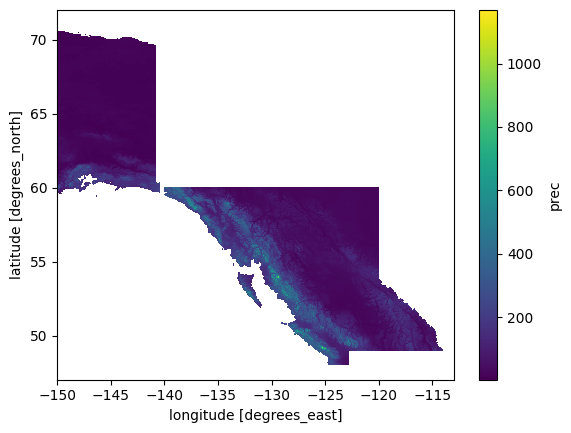

In [4]:
prism.prec.plot(cmap='viridis')

In [5]:
worldclim = worldclim.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
# daymet = daymet.sel(longitude=slice(-145, -135), latitude=slice(63, 57))
prism = prism.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
prism_coarse = prism_coarse.sel(longitude=slice(-145.09, -135), latitude=slice(63.095, 57))
dem = dem.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
lat = lat.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
lon = lon.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
coast = coast.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))
landsea_wc = landsea_wc.sel(longitude=slice(-145.095, -135), latitude=slice(63.095, 57))

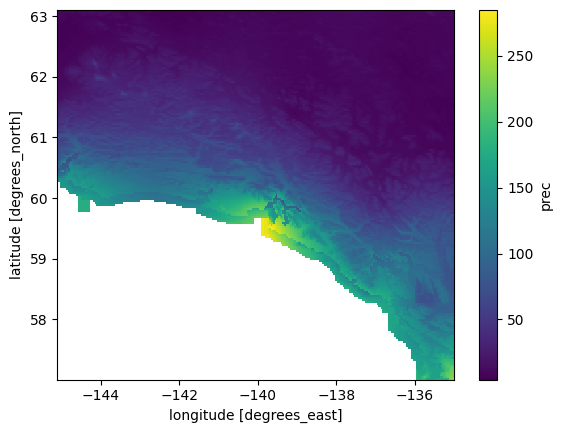

In [6]:
worldclim.prec.plot()

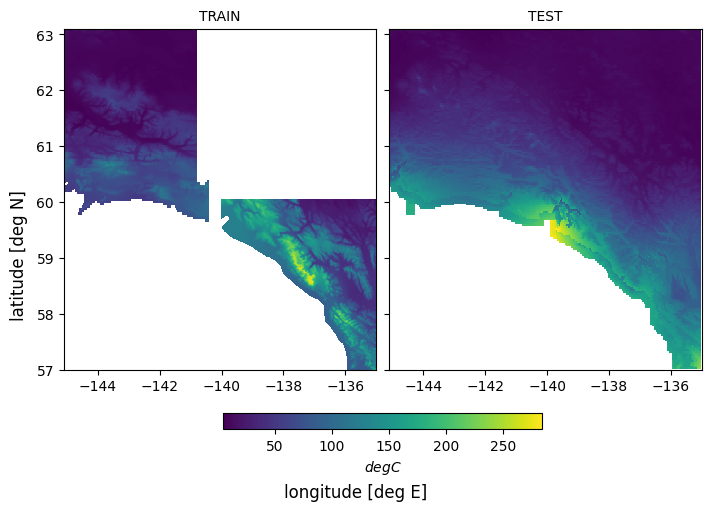

In [7]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.prec, cmap='viridis', label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.prec, cmap='viridis', label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

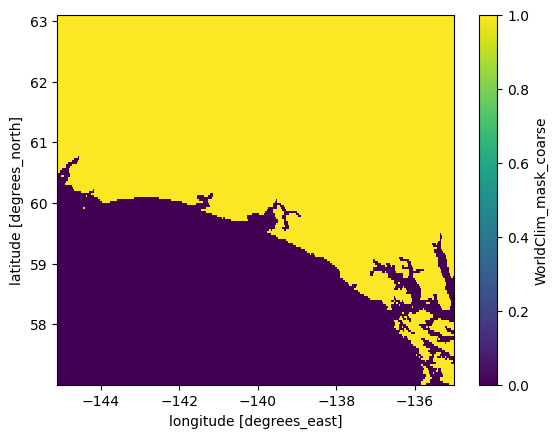

In [8]:
landsea_wc.WorldClim_mask_coarse.plot()

In [9]:
worldclim_tens = torch.from_numpy(np.array(worldclim.prec))
# daymet_tens = torch.from_numpy(np.array(daymet.prec))
prism_tens = torch.from_numpy(np.array(prism.prec))
prism_coarse_tens = torch.from_numpy(np.array(prism_coarse.prec))
dem_tens = torch.from_numpy(np.array(dem.dem))
lat_tens = torch.from_numpy(np.array(lat.lat))
lon_tens = torch.from_numpy(np.array(lon.lon))
coast_tens = torch.from_numpy(np.array(coast.dist))
landsea_wc_tens = torch.from_numpy(np.array(landsea_wc.WorldClim_mask_coarse))

In [10]:
worldclim_tens = worldclim_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
# daymet_tens = daymet_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
dem_tens = dem_tens.where(np.isnan(prism_tens)==False, np.nan)
lat_tens = lat_tens.where(np.isnan(prism_tens)==False, np.nan)
lon_tens = lon_tens.where(np.isnan(prism_tens)==False, np.nan)
coast_tens = coast_tens.where(np.isnan(prism_tens)==False, np.nan)

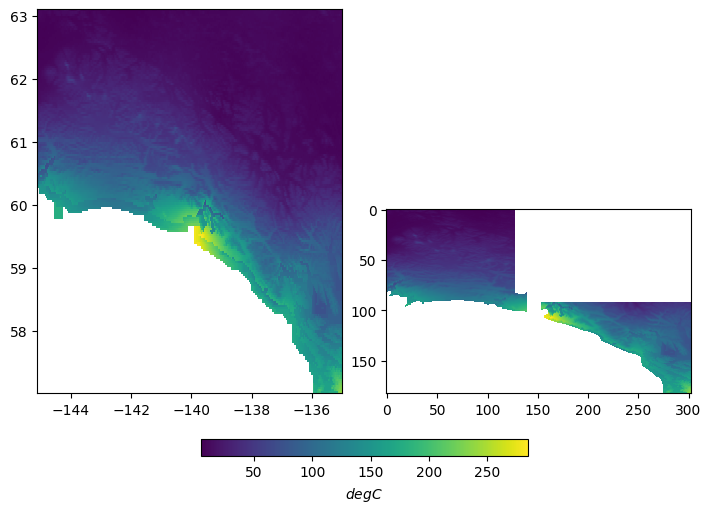

In [11]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5))

pc1 = ax[0].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.prec, cmap='viridis', label=r'$m$')
pc2 = ax[1].imshow(worldclim_tens, cmap='viridis', label=r'$m$')


fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [12]:
prism_prec = prism['prec']
worldclim_prec = worldclim['prec']
# daymet_prec = daymet['prec']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [13]:
prism_mean = np.nanmean(prism_tens)
worldclim_mean = np.nanmean(worldclim_tens)
# daymet_mean = np.nanmean(daymet_tens)
coast_mean = np.nanmean(coast_tens)
dem_mean = np.nanmean(dem_tens)
lat_mean = np.nanmean(lat_tens)
lon_mean = np.nanmean(lon_tens)

In [14]:
# calculating standard deviation 

prism_std = np.nanstd(prism_tens)
worldclim_std = np.nanstd(worldclim_tens)
# daymet_std = np.nanstd(daymet_tens)
coast_std = np.nanstd(coast_tens)
dem_std = np.nanstd(dem_tens)
lat_std = np.nanstd(lat_tens)
lon_std = np.nanstd(lon_tens)

In [15]:
prism_std


113.09613

In [16]:
import csv 
# standardization is done based on mean and standard deviation of training data
# testing data is normalized using that mean and std
# data rows as dictionary objects 
mydict =[{'var': 'prec','clim': 'prism', 'mean': prism_mean, 'std':prism_std}, 
         {'var': 'prec', 'clim': 'worldclim', 'mean': worldclim_mean, 'std':worldclim_std},
        #  {'var': 'prec', 'clim': 'daymet', 'mean': daymet_mean, 'std':daymet_std},  
         {'var': 'dist from coast', 'clim': 'prism', 'mean':coast_mean, 'std':coast_std},
         {'var': 'dem', 'clim': 'prism', 'mean':dem_mean, 'std':dem_std},
         {'var': 'lat', 'clim': 'prism', 'mean':lat_mean, 'std':lat_std},
         {'var': 'lon', 'clim': 'prism', 'mean':lon_mean, 'std':lon_std},
         ]

# field names 
fields = ['var', 'clim', 'mean', 'std'] 

with open('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/standardization.csv', 'w', newline='') as file: 
    writer = csv.DictWriter(file, fieldnames = fields)

    writer.writeheader() 

    writer.writerows(mydict)

In [17]:
# standardizing all variables 
prism['prec'] = (prism_prec - prism_mean)/prism_std
worldclim['prec'] = (worldclim_prec - worldclim_mean)/worldclim_std
# daymet['prec'] = (daymet_prec - daymet_mean)/daymet_std
coast['dist'] = (coast_dist - coast_mean)/coast_std
dem['dem'] = (dem_dem - dem_mean)/dem_std
lat['lat'] = (lat_lat - lat_mean)/lat_std
lon['lon'] = (lon_lon - lon_mean)/lon_std

In [18]:
prism.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/prism_train.nc')
worldclim.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/worldclim_train.nc')
# daymet.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_train.nc')
dem.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/dem_train.nc')
lat.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/lat_train.nc')
lon.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/lon_train.nc')
coast.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/coast_train.nc')
landsea_wc.WorldClim_mask_coarse.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/landsea_train.nc')

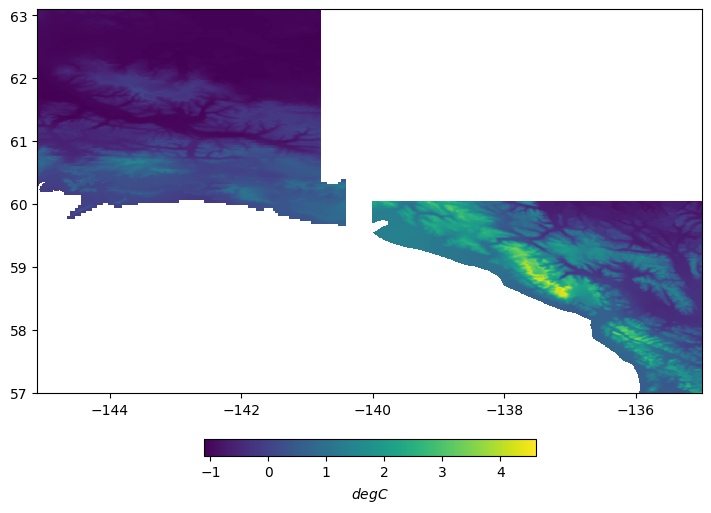

In [19]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/prism_train.nc')

fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(x.longitude, x.latitude, x.prec, cmap='viridis', label=r'$m$')

# ax.set_ylim(50,51)
# ax.set_xlim(-116,-124)

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', label=r'$deg C$')

In [20]:
prism_pt = np.array(prism.prec)
worldclim_pt = np.array(worldclim.prec)
landsea_pt = np.array(landsea_wc.WorldClim_mask_coarse)
# daymet_pt = np.array(daymet.prec)
coast_pt = np.array(coast.dist)
dem_pt = np.array(dem.dem)
lat_pt = np.array(lat.lat)
lon_pt = np.array(lon.lon)

In [21]:
x_fine = np.arange(0,prism_pt.shape[0]-64, 8)
y_fine = np.arange(0,prism_pt.shape[1]-64, 8)

x_coarse = np.arange(0,worldclim_pt.shape[0]-16, 2)
y_coarse = np.arange(0,worldclim_pt.shape[1]-16, 2)

In [22]:
tiles_fine_prism = []
tiles_fine_coast = []
tiles_fine_dem = []
tiles_fine_lat = []
tiles_fine_lon = []
for i in range(0, len(y_fine)):
    prism = prism_pt[:,0+y_fine[i]:64+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:64+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:64+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:64+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:64+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism.append(prism[0+x_fine[j]:64+x_fine[j]])
        tiles_fine_coast.append(coast[0+x_fine[j]:64+x_fine[j]])
        tiles_fine_dem.append(dem[0+x_fine[j]:64+x_fine[j]])
        tiles_fine_lat.append(lat[0+x_fine[j]:64+x_fine[j]])
        tiles_fine_lon.append(lon[0+x_fine[j]:64+x_fine[j]])

In [23]:
prism_pt.shape

(732, 1212)

In [24]:
len(tiles_fine_prism)

12096

In [25]:
prism_pt.shape

(732, 1212)

In [26]:
worldclim_pt.shape

(183, 303)

In [27]:
tiles_coarse_worldclim = []
tiles_coarse_landsea = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_pt[:,0+y_coarse[i]:16+y_coarse[i]]
    landsea = landsea_pt[:,0+y_coarse[i]:16+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim.append(worldclim[0+x_coarse[j]:16+x_coarse[j]])
        tiles_coarse_landsea.append(landsea[0+x_coarse[j]:16+x_coarse[j]])

In [28]:
# create for all covariates 
# worldclim and HR 
# calculate which tiles have NAN values based on PRISM grid and then do the same to the other ones  
# throw out ones with all nan 
# if more than 3/4 is good -> fill in nan with average values 


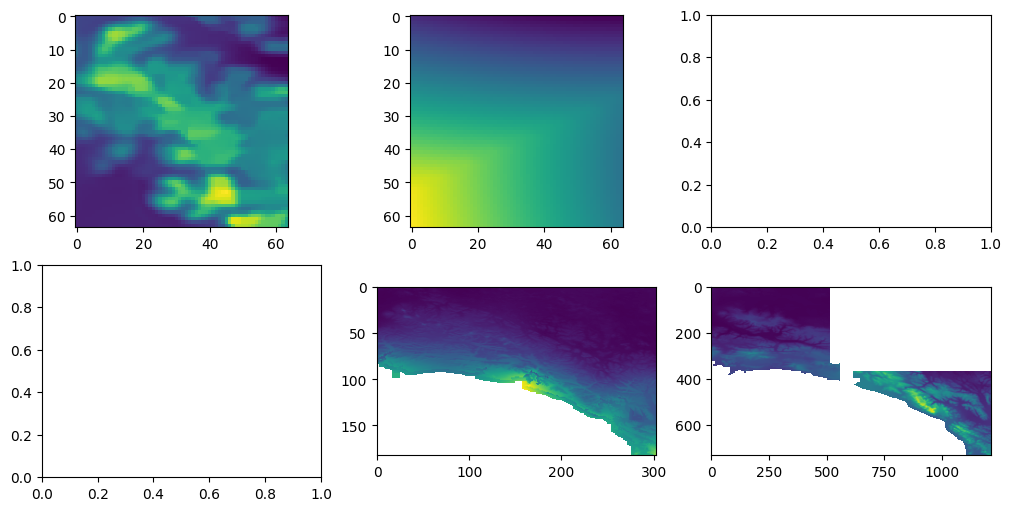

In [29]:
i = -1
fig, ax = plt.subplots(2, 3, layout='constrained', figsize=(10, 5))

pc1 = ax[0,0].imshow(tiles_fine_prism[i])

pc1 = ax[0,1].imshow(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
pc3 = ax[1,2].imshow(prism_pt)
# pc4 = ax[1,0].imshow(daymet_pt)
pc4 = ax[1,1].imshow(worldclim_pt)

In [30]:
size_fine = 64*64
size_coarse = 16*16

good_tiles_prism = []
good_tiles_dem = []
good_tiles_coast = []
good_tiles_lat = []
good_tiles_lon = []

good_tiles_worldclim = []
good_tiles_landsea = []

for i in range(0, len(tiles_fine_prism)):
    ind = np.argwhere(np.isnan(tiles_fine_prism[i]))
    percent_nan_prism = ind.shape[0]/size_fine *64
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *64
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism.append(tiles_fine_prism[i])
        good_tiles_dem.append(tiles_fine_dem[i])
        good_tiles_coast.append(tiles_fine_coast[i])
        good_tiles_lat.append(tiles_fine_lat[i])
        good_tiles_lon.append(tiles_fine_lon[i])
        
        good_tiles_worldclim.append(tiles_coarse_worldclim[i])
        good_tiles_landsea.append(tiles_coarse_landsea[i])

In [31]:
del tiles_fine_prism 
del tiles_coarse_worldclim
del tiles_fine_dem
del tiles_fine_coast
del tiles_fine_lat
del tiles_fine_lon

In [32]:
import gc
gc.collect()

24

In [33]:
gc.collect()

0

In [34]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_prism))]
good_tiles_prism = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/prism_train.pt')

del good_tiles_prism
del tiles_unsq

gc.collect()

0

In [35]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim))]
good_tiles_worldclim = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_landsea))]
good_tiles_landsea = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_worldclim, good_tiles_landsea), dim=1)

torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/worldclim_train.pt')

del good_tiles_worldclim
del x
del tiles_unsq
del good_tiles_landsea

gc.collect()

8

In [36]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

In [37]:
x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)
x.shape

torch.Size([3245, 4, 64, 64])

In [38]:
torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_4/HR_covariates_train.pt')

del x 
del good_tiles_dem
del good_tiles_lat
del good_tiles_lon
del good_tiles_coast

gc.collect()

0